**CLASSIFICATION**

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:
import pandas as pd

X_train = pd.read_csv('input.csv', header=None).values
Y_train = pd.read_csv('labels.csv', header=None).values

X_test = pd.read_csv('input_test.csv', header=None).values
Y_test = pd.read_csv('/content/labels_test .csv', header=None).values

In [ ]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)
X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

In [ ]:
print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", Y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_test: ", Y_test.shape)

shape of X_train:  (431, 100, 100, 3)
shape of Y_train:  (2000, 1)
shape of X_test:  (400, 100, 100, 3)
shape of Y_test:  (400, 1)


In [ ]:
Y_train = Y_train[:len(X_train)]

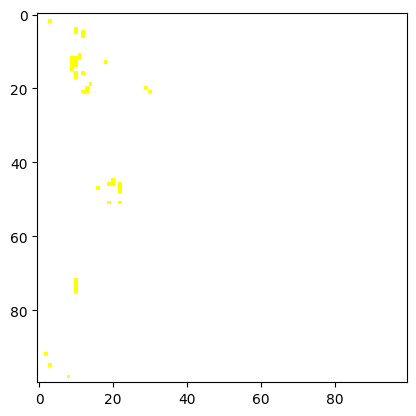

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

 **MODEL**

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
Y_train = Y_train.ravel()
Y_test  = Y_test.ravel()

In [ ]:
model.fit(
    X_train, Y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test, Y_test)
)

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6727 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 1.0000 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 1.0000 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 988ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 0.5000 - val_loss: nan


In [ ]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.7916 - loss: nan


[nan, 0.5]

**Making predictions**


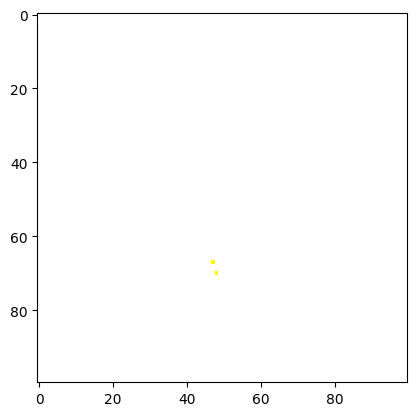

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Model says it is a: dog


In [ ]:
import random
import matplotlib.pyplot as plt

# Save the model
model.save('cnn_model.h5')

# Pick a random test sample
idx2 = random.randint(0, len(Y_test)-1)

# Show the image
plt.imshow(X_test[idx2])
plt.show()

# Predict
y_pred = model.predict(X_test[idx2].reshape(1, 100, 100, 3))

# Threshold for binary classification
if y_pred[0][0] > 0.5:
    pred = 'cat'
else:
    pred = 'dog'

print("Model says it is a:", pred)
